# Project Title: E-Commerce Object Classification Model
In this project, we have to perform the following steps. There should be atleast four columns in the dataset:
1. Name
2. Description
3. Price
4. Category

First, we need to load the required libraries for this file.

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Model
from tensorflow.keras.layers import TextVectorization, Input, Embedding, Dense, GlobalAveragePooling1D, concatenate

## 1. Data Preparation
I found this amazing amazon dataset online on data.world. The link is given below:
https://data.world/jegazhu/amazon-products-data

We are using only the first table named Amazon Sale Report in which there is detailed report on Clothes Sales through Amazon.

In [3]:
df=pd.read_csv("Amazon Sale Report.csv")
df.head(10)

<ipython-input-3-2698155ea133>:1: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("Amazon Sale Report.csv")


,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,4/30/2022,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,4/30/2022,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,4/30/2022,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,4/30/2022,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,4/30/2022,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN
5,5,404-1490984-4578765,4/30/2022,Shipped,Amazon,Amazon.in,Expedited,SET264,SET264-KR-NP-XL,Set,...,INR,824.00,GHAZIABAD,UTTAR PRADESH,201102.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,NaN
6,6,408-5748499-6859555,4/30/2022,Shipped,Amazon,Amazon.in,Expedited,J0095,J0095-SET-L,Set,...,INR,653.00,CHANDIGARH,CHANDIGARH,160036.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,NaN
7,7,406-7807733-3785945,4/30/2022,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3405,JNE3405-KR-S,kurta,...,INR,399.00,HYDERABAD,TELANGANA,500032.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
8,8,407-5443024-5233168,4/30/2022,Cancelled,Amazon,Amazon.in,Expedited,SET200,SET200-KR-NP-A-XXXL,Set,...,NaN,NaN,HYDERABAD,TELANGANA,500008.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,NaN
9,9,402-4393761-0311520,4/30/2022,Shipped,Amazon,Amazon.in,Expedited,JNE3461,JNE3461-KR-XXL,kurta,...,INR,363.00,Chennai,TAMIL NADU,600041.0,IN,NaN,False,NaN,NaN


As, we do not need the unneccessary columns so we are removing them from our dataset.

In [4]:
df.drop(["index","Order ID","Date","Status","Fulfilment","Sales Channel ","ship-service-level", "Size", "ASIN","Courier Status","Qty","ship-city",	"ship-state","ship-postal-code","ship-country","promotion-ids","B2B","fulfilled-by","Unnamed: 22"],axis=1,inplace=True)
df.head(10)

,Style,SKU,Category,currency,Amount
0,SET389,SET389-KR-NP-S,Set,INR,647.62
1,JNE3781,JNE3781-KR-XXXL,kurta,INR,406.00
2,JNE3371,JNE3371-KR-XL,kurta,INR,329.00
3,J0341,J0341-DR-L,Western Dress,INR,753.33
4,JNE3671,JNE3671-TU-XXXL,Top,INR,574.00
5,SET264,SET264-KR-NP-XL,Set,INR,824.00
6,J0095,J0095-SET-L,Set,INR,653.00
7,JNE3405,JNE3405-KR-S,kurta,INR,399.00
8,SET200,SET200-KR-NP-A-XXXL,Set,NaN,NaN
9,JNE3461,JNE3461-KR-XXL,kurta,INR,363.00


Remaning columns for better description and better understanding. Here, style is actually the name of the clothes product or its code id. SKU is like a description of the clothes like M size, XL Extra Large size. etc and Category is like which type of clothing is this, e.g western style, kerta, etc. Amount is actually the price of the product.

In [5]:
df.rename(columns={"Style":"Name","SKU": "Description"," Amount ":"price"},inplace=True)
df.head()

,Name,Description,Category,currency,price
0,SET389,SET389-KR-NP-S,Set,INR,647.62
1,JNE3781,JNE3781-KR-XXXL,kurta,INR,406.00
2,JNE3371,JNE3371-KR-XL,kurta,INR,329.00
3,J0341,J0341-DR-L,Western Dress,INR,753.33
4,JNE3671,JNE3671-TU-XXXL,Top,INR,574.00


## 2- Data Preprocessing
Here, we can easy visualize that there are null values present in our dataset. To remove the null values from our dataset, we are deleting the entire row.

### Dealing with Null Values

In [6]:
df.isna().sum()

Name              0
Description       0
Category          0
currency       7795
price          7795
dtype: int64

In [7]:
df.dropna(inplace=True)
df.isna().sum()

Name           0
Description    0
Category       0
currency       0
price          0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 121180 entries, 0 to 128974
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Name         121180 non-null  object
 1   Description  121180 non-null  object
 2   Category     121180 non-null  object
 3   currency     121180 non-null  object
 4   price        121180 non-null  object
dtypes: object(5)
memory usage: 5.5+ MB


### Dealing with Unique Values
We were considering the currency, until now, because we have considered that currency is not unique. Now, when we visualize that the currency is unique. It means that currency column would not create any kind of impact to our model. That's why it is better to remove this column.

In [9]:
df["currency"].unique()

array(['INR'], dtype=object)

In [10]:
df.drop("currency",axis=1,inplace=True)

### Dealing with Duplicates
In the next step, we are drop duplicates rows. Duplicates can overfit the model, so it is better to drop them.

In [11]:
df.drop_duplicates(inplace=True)
df.describe()

,Name,Description,Category,price
count,21784,21784,21784,21784
unique,1373,7157,9,1410
top,JNE3797,JNE3797-KR-M,kurta,-
freq,135,19,8576,1339


### Changing data type

In [12]:
df["price"]=df["price"].str.strip()
df["price"]=df["price"].str.replace(",","")
df.drop(index=df.price[df.price=="-"].index,axis=0,inplace=True)
df["price"]=df["price"].astype(np.float16)
df.head()

,Name,Description,Category,price
0,SET389,SET389-KR-NP-S,Set,647.5
1,JNE3781,JNE3781-KR-XXXL,kurta,406.0
2,JNE3371,JNE3371-KR-XL,kurta,329.0
3,J0341,J0341-DR-L,Western Dress,753.5
4,JNE3671,JNE3671-TU-XXXL,Top,574.0


In [13]:
df['Description']=df["Description"].str.strip()
df['Description']=df["Description"].str.replace("-"," ")
df.head()

,Name,Description,Category,price
0,SET389,SET389 KR NP S,Set,647.5
1,JNE3781,JNE3781 KR XXXL,kurta,406.0
2,JNE3371,JNE3371 KR XL,kurta,329.0
3,J0341,J0341 DR L,Western Dress,753.5
4,JNE3671,JNE3671 TU XXXL,Top,574.0


In [14]:
df.to_csv("cleaned_dataset.csv")

## Data Visualization

First, I need to visualize the dataset using some diagrams then I would start the data encoding.

In [15]:
df["Category"].unique()

array(['Set', 'kurta', 'Western Dress', 'Top', 'Ethnic Dress', 'Bottom',
       'Saree', 'Blouse', 'Dupatta'], dtype=object)

### Histogram of Categories

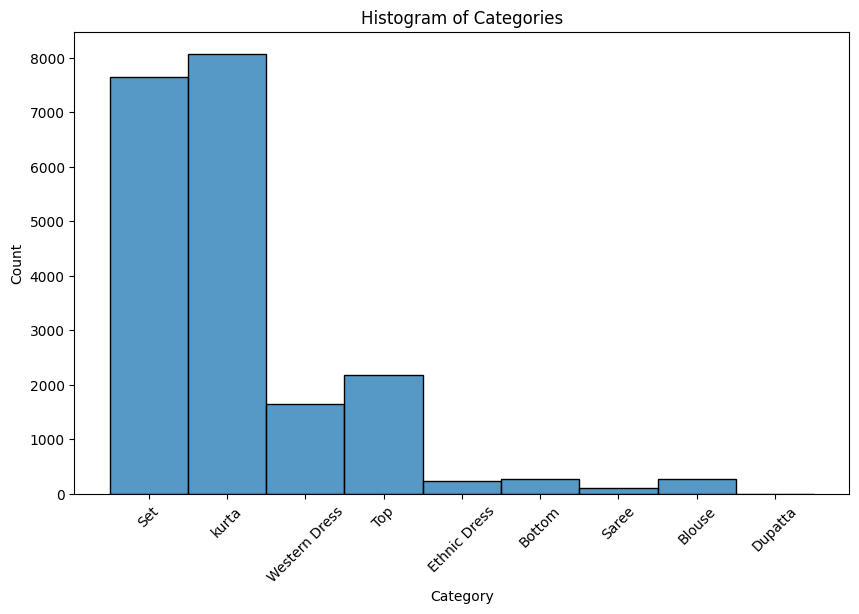

In [16]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Category'], kde=False, bins=len(df['Category'].unique()))
plt.title('Histogram of Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

### Distribution of Prices

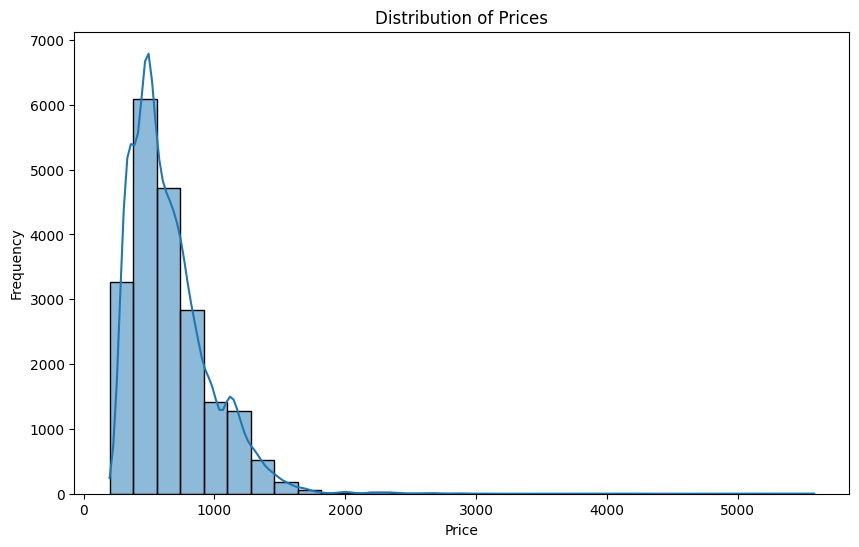

In [17]:
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], kde=True, bins=30)
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

### Boxplot of Prices of all Category

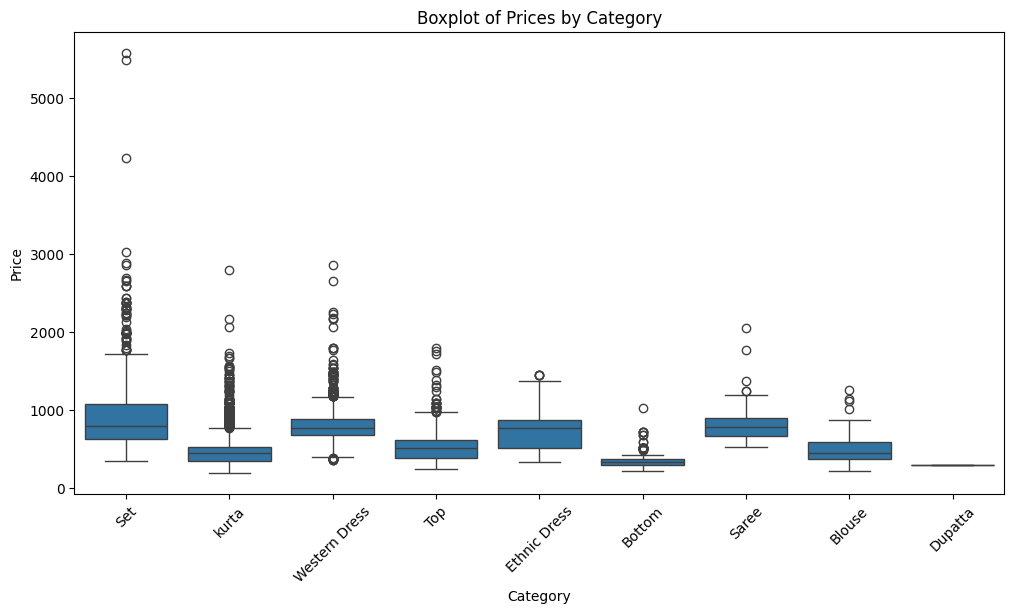

In [18]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Category', y='price', data=df)
plt.title('Boxplot of Prices by Category')
plt.xlabel('Category')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

### Average Price per Category

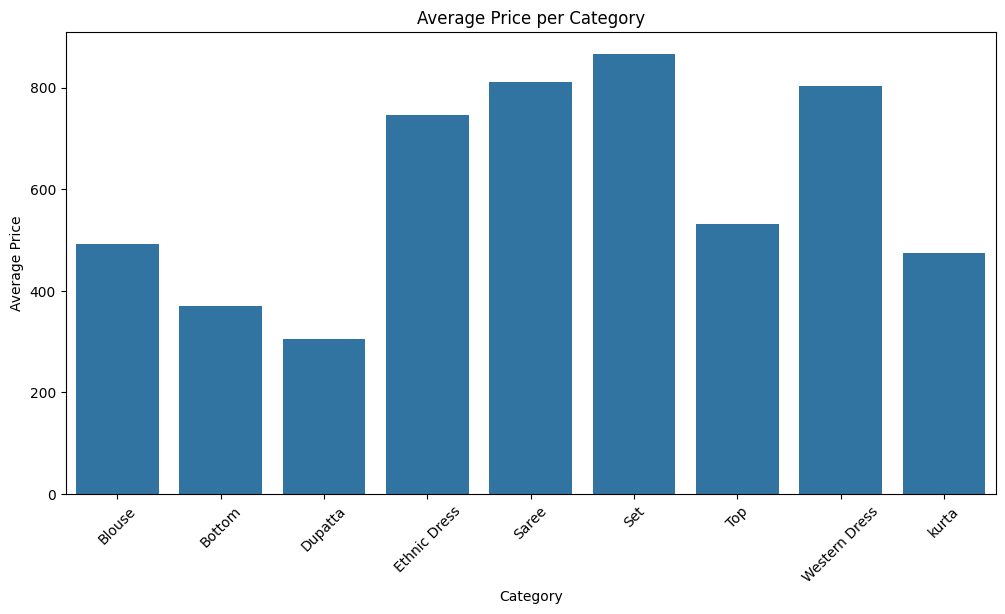

In [19]:
average_price_per_category = df.groupby('Category')['price'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='Category', y='price', data=average_price_per_category)
plt.title('Average Price per Category')
plt.xlabel('Category')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()

After clearful viewing the dataset, we can see the dataset is more bised towards the set and kurta. Moreover, there is comparitively nothing in case of Dupatta category. So, I am droping the Dupatta category from the dataset.

In [20]:
df.drop(index=df.Category[df.Category=="Dupatta"].index,axis=0,inplace=True)
df.Category.unique()

array(['Set', 'kurta', 'Western Dress', 'Top', 'Ethnic Dress', 'Bottom',
       'Saree', 'Blouse'], dtype=object)

Also, the price of set greater that 3000 is also a kind of outlier. To remove this outliers I am doing the following thing.

In [21]:
df.drop(index=df.price[df.price>3200].index, axis=0, inplace=True)

In [22]:
df.describe()

,price
count,20439.0
mean,inf
std,inf
min,199.0
25%,446.0
50%,586.0
75%,799.0
max,3036.0


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20439 entries, 0 to 128956
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         20439 non-null  object 
 1   Description  20439 non-null  object 
 2   Category     20439 non-null  object 
 3   price        20439 non-null  float16
dtypes: float16(1), object(3)
memory usage: 678.6+ KB


In [24]:
df.head(10)

,Name,Description,Category,price
0,SET389,SET389 KR NP S,Set,647.5
1,JNE3781,JNE3781 KR XXXL,kurta,406.0
2,JNE3371,JNE3371 KR XL,kurta,329.0
3,J0341,J0341 DR L,Western Dress,753.5
4,JNE3671,JNE3671 TU XXXL,Top,574.0
5,SET264,SET264 KR NP XL,Set,824.0
6,J0095,J0095 SET L,Set,653.0
7,JNE3405,JNE3405 KR S,kurta,399.0
9,JNE3461,JNE3461 KR XXL,kurta,363.0
10,JNE3160,JNE3160 KR G S,kurta,685.0


## Encoding and Convertion of Dataset:

### Category Encoding

In [25]:
OUTPUT=['Set', 'kurta', 'Western Dress', 'Top', 'Ethnic Dress', 'Bottom',
       'Saree', 'Blouse']
maping_list={category: index for index, category in enumerate(OUTPUT)}
df.Category=df.Category.map(maping_list)
df.head()

,Name,Description,Category,price
0,SET389,SET389 KR NP S,0,647.5
1,JNE3781,JNE3781 KR XXXL,1,406.0
2,JNE3371,JNE3371 KR XL,1,329.0
3,J0341,J0341 DR L,2,753.5
4,JNE3671,JNE3671 TU XXXL,3,574.0


### Scaling Price

In [26]:
MEAN_PRICE = 656.807867
STD_PRICE = 297.299774

def custom_standard_scaler(column, MEAN_PRICE, STD_PRICE):
    return (column - MEAN_PRICE) / STD_PRICE

In [27]:
df['price_scaled'] = custom_standard_scaler(df['price'], MEAN_PRICE, STD_PRICE)
df.head()

,Name,Description,Category,price,price_scaled
0,SET389,SET389 KR NP S,0,647.5,-0.031952
1,JNE3781,JNE3781 KR XXXL,1,406.0,-0.844238
2,JNE3371,JNE3371 KR XL,1,329.0,-1.103516
3,J0341,J0341 DR L,2,753.5,0.324707
4,JNE3671,JNE3671 TU XXXL,3,574.0,-0.279297


### Text Tokenizors

In [28]:
max_tokens = 1000

# TextVectorization for Name
name_vectorizer = TextVectorization(max_tokens=max_tokens, output_mode='int', output_sequence_length=1)
name_vectorizer.adapt(df['Name'].values)

# TextVectorization for Description
desc_vectorizer = TextVectorization(max_tokens=max_tokens, output_mode='int', output_sequence_length=5)
desc_vectorizer.adapt(df['Description'].values)

# Apply the vectorization
df['Name_Vectorized'] = list(name_vectorizer(df['Name']).numpy())
df['Description_Vectorized'] = list(desc_vectorizer(df['Description']).numpy())

# Saving the vectors for later use:
name_vectorizer_model = tf.keras.Sequential([tf.keras.Input(shape=(1,), dtype=tf.string), name_vectorizer])
desc_vectorizer_model = tf.keras.Sequential([tf.keras.Input(shape=(1,), dtype=tf.string), desc_vectorizer])

name_vectorizer_model.save('name_vectorizer')
desc_vectorizer_model.save('desc_vectorizer')

In [29]:
df.head(10)

,Name,Description,Category,price,price_scaled,Name_Vectorized,Description_Vectorized
0,SET389,SET389 KR NP S,0,647.5,-0.031952,[75],"[109, 2, 3, 8, 0]"
1,JNE3781,JNE3781 KR XXXL,1,406.0,-0.844238,[66],"[100, 2, 9, 0, 0]"
2,JNE3371,JNE3371 KR XL,1,329.0,-1.103516,[397],"[445, 2, 4, 0, 0]"
3,J0341,J0341 DR L,2,753.5,0.324707,[4],"[33, 12, 5, 0, 0]"
4,JNE3671,JNE3671 TU XXXL,3,574.0,-0.279297,[324],"[367, 18, 9, 0, 0]"
5,SET264,SET264 KR NP XL,0,824.0,0.562012,[481],"[538, 2, 3, 4, 0]"
6,J0095,J0095 SET L,0,653.0,-0.013458,[74],"[108, 15, 5, 0, 0]"
7,JNE3405,JNE3405 KR S,1,399.0,-0.868164,[55],"[89, 2, 8, 0, 0]"
9,JNE3461,JNE3461 KR XXL,1,363.0,-0.989258,[27],"[58, 2, 7, 0, 0]"
10,JNE3160,JNE3160 KR G S,1,685.0,0.094177,[12],"[42, 2, 85, 8, 0]"


## Model Creation:
We are using simple tensorflow structure to create the classification model of 8 categories.

In [30]:
# Define input layers
name_input = Input(shape=(1,), dtype='int32', name='name_input')
desc_input = Input(shape=(5,), dtype='int32', name='desc_input')
price_input = Input(shape=(1,), dtype='float32', name='price_input')

# Embedding layers
name_embedding = Embedding(input_dim=max_tokens, output_dim=16)(name_input)
desc_embedding = Embedding(input_dim=max_tokens, output_dim=16)(desc_input)

# Global average pooling
name_pooling = GlobalAveragePooling1D()(name_embedding)
desc_pooling = GlobalAveragePooling1D()(desc_embedding)

# Concatenate the pooled outputs and price input
concat = concatenate([name_pooling, desc_pooling, price_input])

# Dense layers
dense = Dense(32, activation='relu')(concat)
output = Dense(8, activation='softmax')(dense)

# Create the model
model = Model(inputs=[name_input, desc_input, price_input], outputs=output)

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Display the model architecture
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 name_input (InputLayer)     [(None, 1)]                  0         []                            
                                                                                                  
 desc_input (InputLayer)     [(None, 5)]                  0         []                            
                                                                                                  
 embedding (Embedding)       (None, 1, 16)                16000     ['name_input[0][0]']          
                                                                                                  
 embedding_1 (Embedding)     (None, 5, 16)                16000     ['desc_input[0][0]']          
                                                                                              

## Model Training


In [31]:
X_name = np.array(list(df['Name_Vectorized']))
X_desc = np.array(list(df['Description_Vectorized']))
X_price = np.array(df['price_scaled']).reshape(-1, 1)
y = np.array(df['Category'])

model.fit([X_name, X_desc, X_price], y, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
511/511 [==============================] - 3s 4ms/step - loss: 0.7368 - accuracy: 0.7987 - val_loss: 0.1942 - val_accuracy: 0.9391
Epoch 2/10
511/511 [==============================] - 2s 5ms/step - loss: 0.0939 - accuracy: 0.9692 - val_loss: 0.0816 - val_accuracy: 0.9834
Epoch 3/10
511/511 [==============================] - 3s 6ms/step - loss: 0.0432 - accuracy: 0.9898 - val_loss: 0.0450 - val_accuracy: 0.9907
Epoch 4/10
511/511 [==============================] - 2s 3ms/step - loss: 0.0235 - accuracy: 0.9940 - val_loss: 0.0274 - val_accuracy: 0.9917
Epoch 5/10
511/511 [==============================] - 2s 3ms/step - loss: 0.0160 - accuracy: 0.9954 - val_loss: 0.0205 - val_accuracy: 0.9934
Epoch 6/10
511/511 [==============================] - 2s 3ms/step - loss: 0.0124 - accuracy: 0.9961 - val_loss: 0.0187 - val_accuracy: 0.9917
Epoch 7/10
511/511 [==============================] - 2s 3ms/step - loss: 0.0103 - accuracy: 0.9968 - val_loss: 0.0153 - val_accuracy: 0.9946
Epoch 

## Model Evaluation

In [32]:
loss, accuracy = model.evaluate([X_name, X_desc, X_price], y)
print(f"Loss: {loss}, Accuracy: {accuracy}")

639/639 [==============================] - 1s 2ms/step - loss: 0.0083 - accuracy: 0.9966
Loss: 0.008312361314892769, Accuracy: 0.9966241121292114


### Model Save

In [33]:
model.save("Object_Classification_Model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Complete Model Testing
First, we need to import data and libraries

In [35]:
import tensorflow as tf
from tensorflow.keras.models import Model,load_model
import numpy as np

In [36]:
CATEGORY=['Set', 'kurta', 'Western Dress', 'Top', 'Ethnic Dress', 'Bottom',
       'Saree', 'Blouse']
MEAN_PRICE = 656.807867
STD_PRICE = 297.299774

def custom_standard_scaler(column, MEAN_PRICE, STD_PRICE):
    return (column - MEAN_PRICE) / STD_PRICE

## Model Loading

In [37]:
model=load_model("Object_Classification_Model.h5")
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 name_input (InputLayer)     [(None, 1)]                  0         []                            
                                                                                                  
 desc_input (InputLayer)     [(None, 5)]                  0         []                            
                                                                                                  
 embedding (Embedding)       (None, 1, 16)                16000     ['name_input[0][0]']          
                                                                                                  
 embedding_1 (Embedding)     (None, 5, 16)                16000     ['desc_input[0][0]']          
                                                                                              

## Loading Text Vectorizers

In [38]:
loaded_name_vectorizer_model = tf.keras.models.load_model('name_vectorizer')
loaded_desc_vectorizer_model = tf.keras.models.load_model('desc_vectorizer')

# Access the TextVectorization layers from the models
name_vectorizer = loaded_name_vectorizer_model.layers[0]
desc_vectorizer = loaded_desc_vectorizer_model.layers[0]

## Custom Functions

In [39]:
def format_input(price, name, description):
    input_price = np.array(custom_standard_scaler(price, MEAN_PRICE, STD_PRICE)).reshape(-1,1)
    input_name = name_vectorizer([name]).numpy()
    input_desc = desc_vectorizer([description.replace("-"," ")]).numpy()
    return [input_name, input_desc, input_price]

def run_model(input):
    prediction=model.predict(input)
    return CATEGORY[np.argmax(prediction)]

In [40]:
name="JNE3405"
description="JNE3405 KR XXL"
price=399
input=format_input(price, name, description)
run_model(input)

1/1 [==============================] - 0s 187ms/step


'kurta'